In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
from datetime import datetime

In [3]:
UberLyft_df = pd.read_csv('cab_rides.csv')

In [4]:
Weather_df = pd.read_csv('weather.csv')

In [5]:
UberLyft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [6]:
Weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [7]:
UberLyft_df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [8]:
#Dropping instances where the price is null 
UberLyft_df.dropna(inplace=True)

UberLyft_df.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [9]:
UberLyft_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [10]:
#removing the "id" and "product_id" columns 
UberLyft_df = UberLyft_df[['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'name']]

UberLyft_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL


In [11]:
#we want to convert the timestamps into date, time, weekday, hour, and time of day (Morning, afternoon, evening, and night)
UberLyft_df["rounded_timestamp"] = UberLyft_df["time_stamp"] / 1000
UberLyft_df["rounded_timestamp"] = UberLyft_df["rounded_timestamp"].apply(np.floor)

UberLyft_df["date"] = UberLyft_df["rounded_timestamp"].apply(lambda x : datetime.fromtimestamp(x).date())
UberLyft_df["time"] = UberLyft_df["rounded_timestamp"].apply(lambda x: datetime.fromtimestamp(x).time())
UberLyft_df['weekday'] = UberLyft_df['date'].apply(lambda x: x.weekday())
UberLyft_df["weekday"] = UberLyft_df["weekday"].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
UberLyft_df['hour'] = UberLyft_df['time'].apply(lambda time: time.hour)

UberLyft_df.loc[(UberLyft_df.hour >= 6) & (UberLyft_df.hour < 12) , 'time_of_day'] = 'Morning'
UberLyft_df.loc[(UberLyft_df.hour >= 12) & (UberLyft_df.hour < 15) , 'time_of_day'] = 'Afternoon'
UberLyft_df.loc[(UberLyft_df.hour >= 15) & (UberLyft_df.hour < 18) , 'time_of_day'] = 'Evening'
UberLyft_df.loc[(UberLyft_df.hour >= 18) | (UberLyft_df.hour < 6) , 'time_of_day'] = 'Night'

UberLyft_df = UberLyft_df[['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'name', 'date', 'time', 'weekday', 'hour', 'time_of_day']]

In [12]:
UberLyft_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,date,time,weekday,hour,time_of_day
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16,10:30:07,Sunday,10,Morning
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27,03:00:23,Tuesday,3,Night
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft,2018-11-28,02:00:22,Wednesday,2,Night
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30,05:53:02,Friday,5,Night
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29,04:49:20,Thursday,4,Night


                                Understanding which factors affect the surge multiplier 

In [13]:
UberLyft_df['cab_type'].value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

In [14]:
#Seperating dataset into Uber and Lyft 
uber_df = UberLyft_df[UberLyft_df['cab_type'] =="Uber"]
lyft_df = UberLyft_df[UberLyft_df['cab_type'] =="Lyft"]

In [15]:
#Picking numerical vales to find correlation 
uber_df_corr = uber_df[["distance", "price", "surge_multiplier"]]
lyft_df_corr = lyft_df[["distance", "price", "surge_multiplier"]]

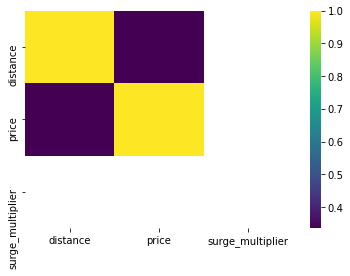

In [16]:
#Showing correlations - (Uber has no surge multiplier instances)
sns.heatmap(uber_df_corr.corr(), cmap="viridis")

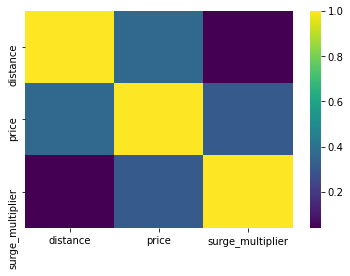

In [17]:
#Correlations 
sns.heatmap(lyft_df_corr.corr() , cmap="viridis")

                            Correlation between surge multiplier and day of week 

In [18]:
#checking value counts for uber (No use of surge multiplier)
#we will only check the correlation for lyft 
uber_df["surge_multiplier"].value_counts()

1.0    330568
Name: surge_multiplier, dtype: int64

In [19]:
#checing value counts for lyft
lyft_df["surge_multiplier"].value_counts()

1.00    286433
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

In [20]:
#We are only concerned with a surge multiplier above 1 
high_surge_dataset = lyft_df[lyft_df["surge_multiplier"]> 1]

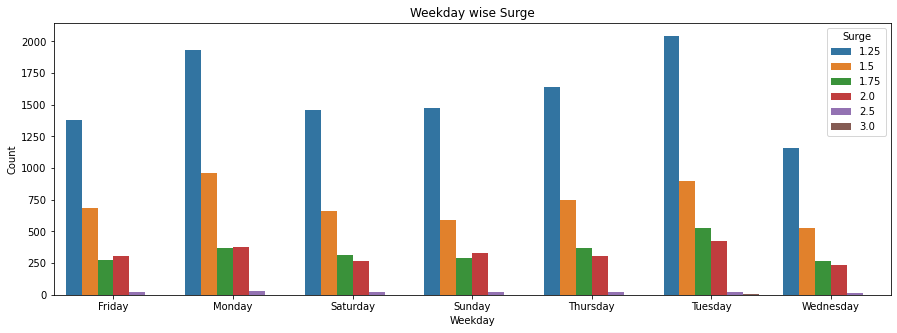

In [21]:
t_high_surge = pd.DataFrame(high_surge_dataset.groupby(["weekday", "surge_multiplier"]).size().reset_index())
t_high_surge.columns = ["Weekday", "Surge", "Count"]
plt.figure(figsize=(15, 5))
sns.barplot(x="Weekday", y="Count", hue="Surge", data=t_high_surge).set_title("Weekday wise Surge");

                                  Correlation between surge multiplier and time of day

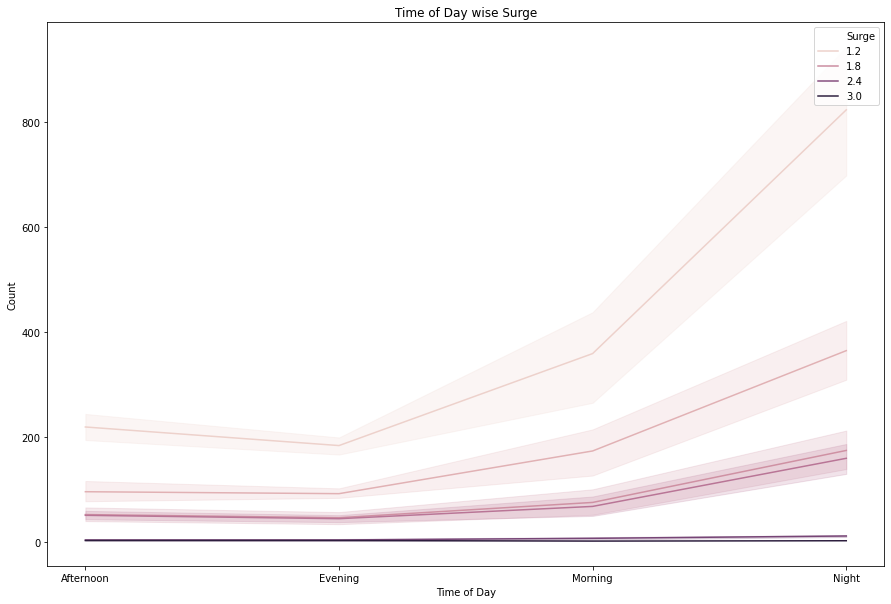

In [22]:
td_high_surge = pd.DataFrame(high_surge_dataset.groupby(["weekday", "surge_multiplier","time_of_day"]).size().reset_index())
td_high_surge.columns = ["Weekday", "Surge", "Time of Day", "Count"]

plt.figure(figsize=(15, 10))
sns.lineplot(x="Time of Day", y="Count", hue="Surge", data=td_high_surge).set_title("Time of Day wise Surge");

                                            Merging the datasets

In [77]:
weather_df = pd.read_csv('weather.csv')
cab_df = pd.read_csv('cab_rides.csv')

In [78]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [79]:
cab_df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [80]:
cab_df["time_stamp"] = cab_df["time_stamp"] / 1000
cab_df["time_stamp"] = cab_df["time_stamp"].apply(np.floor)

In [81]:
cab_df["time_stamp"] = cab_df["time_stamp"].astype(int)
weather_df.columns = ['temp', 'source', 'clouds', 'pressure', 'rain', 'time_stamp', 'humidity', 'wind']
weather_df.isnull().sum()

temp             0
source           0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [82]:
merged_df = pd.merge(weather_df, cab_df, on=["source", "time_stamp"])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3866 entries, 0 to 3865
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp              3866 non-null   float64
 1   source            3866 non-null   object 
 2   clouds            3866 non-null   float64
 3   pressure          3866 non-null   float64
 4   rain              409 non-null    float64
 5   time_stamp        3866 non-null   int64  
 6   humidity          3866 non-null   float64
 7   wind              3866 non-null   float64
 8   distance          3866 non-null   float64
 9   cab_type          3866 non-null   object 
 10  destination       3866 non-null   object 
 11  price             3548 non-null   float64
 12  surge_multiplier  3866 non-null   float64
 13  id                3866 non-null   object 
 14  product_id        3866 non-null   object 
 15  name              3866 non-null   object 
dtypes: float64(9), int64(1), object(6)
memory 

In [83]:
rain_merged_data = merged_df[['source', 'time_stamp', 'cab_type',  "rain"]]
len(rain_merged_data)
rain_merged_data.isnull().sum()

source           0
time_stamp       0
cab_type         0
rain          3457
dtype: int64

In [84]:
merged_df.isnull().sum()

temp                   0
source                 0
clouds                 0
pressure               0
rain                3457
time_stamp             0
humidity               0
wind                   0
distance               0
cab_type               0
destination            0
price                318
surge_multiplier       0
id                     0
product_id             0
name                   0
dtype: int64

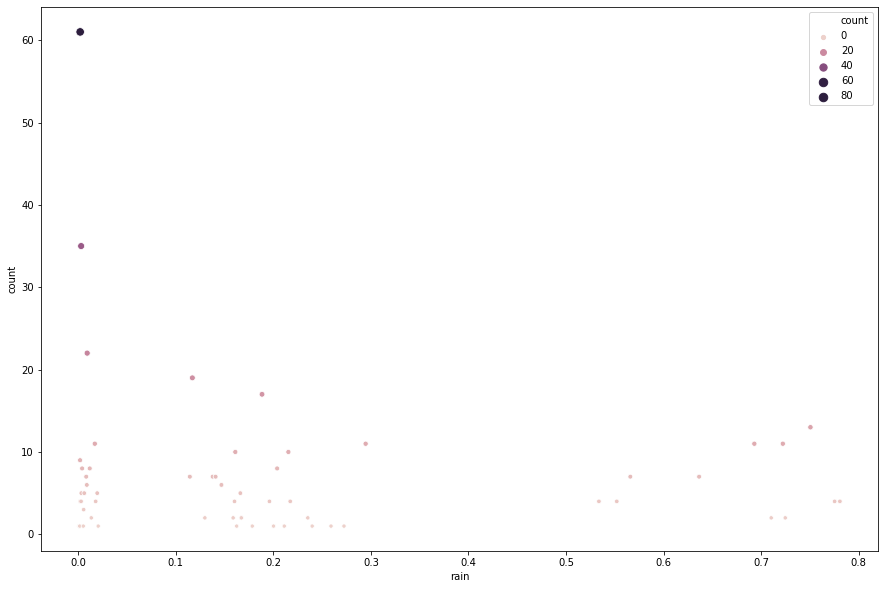

In [85]:
t_rain = rain_merged_data.groupby(["rain"]).size().reset_index()
t_rain.columns=["rain", "count"]
plt.figure(figsize=(15, 10))
sns.scatterplot(data = t_rain, x = "rain", y="count", hue="count", size="count")